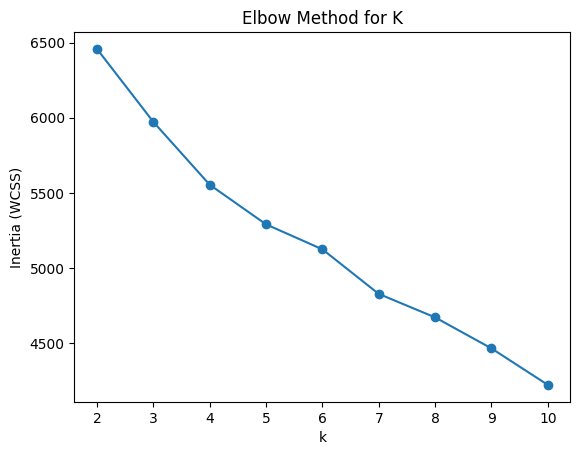

k=2 silhouette=0.149 ARI (vs true)=0.271
k=3 silhouette=0.152 ARI (vs true)=0.224
k=4 silhouette=0.120 ARI (vs true)=0.103
k=5 silhouette=0.128 ARI (vs true)=0.127


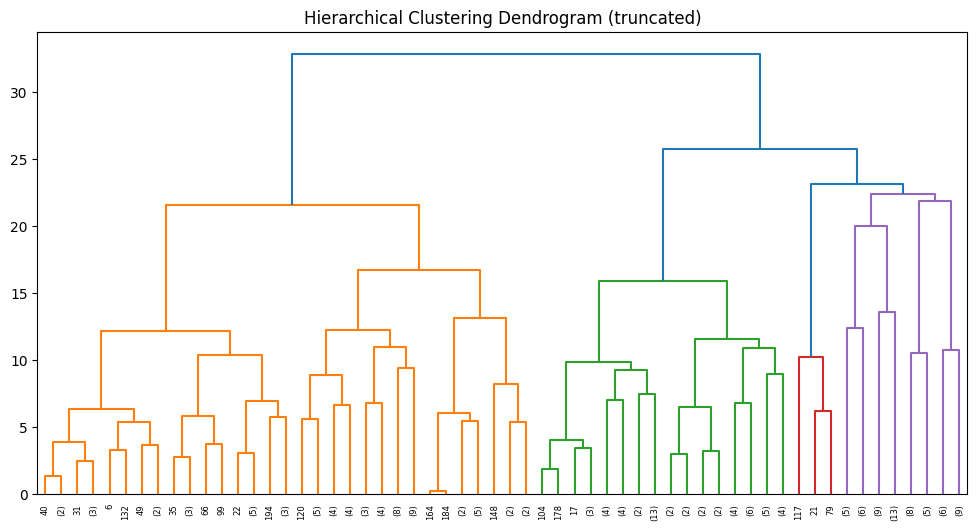

In [1]:
# 05_unsupervised_learning.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

DATA_PATH = "data/processed_cleaned.csv"
df = pd.read_csv(DATA_PATH)
X = df.drop(columns=['target']).values
y = df['target'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans: elbow method
inertia = []
K_range = range(2,11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure()
plt.plot(K_range, inertia, marker='o')
plt.xlabel("k")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for K")
plt.show()

# Silhouette for few ks
for k in [2,3,4,5]:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    ari = adjusted_rand_score(y, labels)
    print(f"k={k} silhouette={sil:.3f} ARI (vs true)={ari:.3f}")

# Hierarchical clustering dendrogram (sample a subset if many points)
sample = X_scaled if X_scaled.shape[0] <= 200 else X_scaled[np.random.choice(X_scaled.shape[0], 200, replace=False)]
Z = linkage(sample, 'ward')
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.show()
